<center><h3>Department of Computer Science & Engineering</h3>
<h3>Session : Jan-May, 2023</h3>
<h5>UE20CS344 – NETWORK ANALYSIS AND MINING</h5>
Lab Evaluation 01</center>

#**Team Members**
>PES1UG20CS192 - KANUMARI SRI CHARAN<br>
PES1UG20CS331 - RENITA KURIAN<br>
PES1UG20CS344 - RIYA JHA<br>
PES1UG20CS484 - VANSHIKA GOEL


# Section 1: Implementation

a. Make a list of characters in the novel. You need to decide whom to include.<br>
Ans - The main characters in the novel "Little Women" by Louisa M. Alcott are:
1. Jo March
2. Beth March
3. Amy March
4. Meg March
5. Laurie Laurence
6. Mr. Laurence 
7. Marmee March/Mother
8. Mr. March/Father
9. Mr. Brooke
10. Frederick Bhaer
11. Hannah
12. Aunt March
13. Daisy
14. Demi
15. Mrs. Kirke
16. Kate Vaughn
17. Sallie Gardiner
18. Aunt Carrol
19. Florence
20. Fred Vaughn
21. Esther
22. Annie Moffat
23. Med Moffat
24. Frank Moffat
25. Grace Vaughn
26. Dr. Bangs
27. Hummels

b. Extract a social graph of the manually identified characters in the text (as shown in the hands-on session). To do this, you need to use a co-occurrence algorithm as discussed and shown in the demo in class. Also, plot the graph using networkx

In [ ]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

In [ ]:
 nltk.download('gutenberg')
 nltk.download('stopwords')

In [ ]:
book = open("Little Women.txt", "r", encoding="utf8")
book = book.read()
print(book)

In [ ]:
characters = ["Jo","Beth","Amy","Meg","Laurie","Mr_Laurence","Marmee","Father","Mr_Brooke","Professor_Bhaer","Hannah","Aunt_March","Daisy","Demi","Mrs_Kirke","Kate","Sallie","Aunt_Carrol","Florence","Fred","Ester","Annie","Med","Frank","Grace","Dr_Bangs","Hummels"]
len(characters)

In [ ]:
book = book.replace("mother","Marmee")
book = book.replace("Mr. March","Father")
book = book.replace("Mr. Laurence","Mr_Laurence")
book = book.replace("Mr. Brooke","Mr_Brooke")
book = book.replace("John Brooke","Mr_Brooke")
book = book.replace("Professor Bhaer","Professor_Bhaer")
book = book.replace("Mr. Bhaer","Professor_Bhaer")
book = book.replace("Mrs. Kirke","Mrs_Kirke")
book = book.replace("Aunt March","Aunt_March")
book = book.replace("Aunt Carrol","Aunt_Carrol")
book = book.replace("Dr. Bangs","Dr_Bangs")

sentences = sent_tokenize(book)
print(len(sentences))

In [ ]:
count = 0
chapters = []
for sent in sentences:
    if ("CHAPTER" in sent and sent[0] == 'C') or "Epilogue" in sent:
        sentences.remove(sent)
        count += 1
    elif 'Alcott' in sent or 'Louisa May Alcott' in sent:
        sentences.remove(sent)
    elif "Little Women" in sent:
        sent.replace("Little Women","LittleWomen")
        
print(len(sentences))

In [ ]:
print(sentences) 

In [ ]:
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.head()

In [ ]:
for sentence in sentences:
    for char1 in characters:
        for char2 in characters:
            if (char1 != char2) and char1 in sentence and char2 in sentence:
                char_df[char1][char2] += 1
                char_df[char2][char1] += 1

char_df.head()

In [ ]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

In [ ]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

In [ ]:
# NetworkX function used to compute the node positions of a graph using the Fruchterman-Reingold force-directed algorithm. 
# G: This is a NetworkX graph object for which we want to compute the node positions.
# k: This is an optional parameter that sets the optimal distance between nodes. Larger values of k result in more space between nodes.
# iterations: This is an optional parameter that sets the number of iterations for which the algorithm should run. 
#Larger values of iterations can result in better node positions, but at the cost of longer computation time.

plt.figure(figsize=(15,10))
pos = nx.fruchterman_reingold_layout(G, k=100, iterations=1)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="lightgreen") #draws the graph G using the specified layout positions pos for the nodes. It sets the size of each node to 800, the font size of the node labels to 8, and the color of the nodes to "lightgreen"
nx.draw_networkx_edges(G, pos=pos) #draws the edges of the graph G using the same layout positions pos.
edge_labels = nx.get_edge_attributes(G, 'weight') #gets the edge weights from the graph G and stores them as a dictionary in edge_labels
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels) #adds labels to the edges of the graph G using the specified layout positions pos and the dictionary of edge weights edge_labels. The labels are placed near the midpoint of each edge.
plt.show()

c. Calculate the four types of centrality of main protagonists i.e. degree, betweenness, closeness, PageRank

1. Degree Centrality

In [ ]:
from operator import itemgetter
degc = nx.degree_centrality(G)
fin_list = sorted(degc.items(), key=itemgetter(1), reverse=True)
print(fin_list)

fin_list = fin_list[0:10]
people = list(zip(*fin_list))[0]
score = list(zip(*fin_list))[1]
x_pos = np.arange(len(people)) 
plt.figure(figsize=(15, 5))
plt.bar(x_pos, score,align='center', color ='maroon')
plt.xticks(x_pos, people) 
plt.ylabel('Degree Centrality')
plt.show() 

2. Betweenness Centrality

In [ ]:
bet = nx.betweenness_centrality(G)
fin_list = sorted(bet.items(), key=itemgetter(1), reverse=True)
print(fin_list)

fin_list = fin_list[0:10]
people = list(zip(*fin_list))[0]
score = list(zip(*fin_list))[1]
x_pos = np.arange(len(people)) 
plt.figure(figsize=(15, 5))
plt.bar(x_pos, score,align='center', color ='maroon')
plt.xticks(x_pos, people) 
plt.ylabel('Betweenness Centrality')
plt.show()

3. Closeness Centrality

In [ ]:
clos = nx.closeness_centrality(G)
fin_list = sorted(clos.items(), key=itemgetter(1), reverse=True)
print(fin_list)

fin_list = fin_list[0:10]
people = list(zip(*fin_list))[0]
score = list(zip(*fin_list))[1]
x_pos = np.arange(len(people)) 
plt.figure(figsize=(15, 5))
plt.bar(x_pos, score,align='center', color ='maroon')
plt.xticks(x_pos, people) 
plt.ylabel('Closeness Centrality')
plt.show()

4. PageRank Centrality

In [ ]:
s='\n sorted pagerank:\n'
print (s)
pgr=nx.pagerank(G)
fin_list = sorted(degc.items(), key=itemgetter(1), reverse=True)
print(fin_list)

fin_list = fin_list[0:10]
people = list(zip(*fin_list))[0]
score = list(zip(*fin_list))[1]
x_pos = np.arange(len(people)) 
plt.figure(figsize=(15, 5))
plt.bar(x_pos, score,align='center', color ='maroon')
plt.xticks(x_pos, people) 
plt.ylabel('Pagerank Centrality')
plt.show()

d. Calculate the global clustering coefficient of your graph and local clustering coefficient of the main protagonist nodes.

In [ ]:
#Local clustering coefficients
d = nx.clustering(G)
print({k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)})

In [ ]:
#Global clsutering coefficients
print(nx.average_clustering(G))

e. Detect communities using the following methods:<br>
i. K - clique (percolation method)<br>
ii. Louvain community detection<br>
iii. Girvann Newman


K - clique (percolation method)

In [ ]:
#Clique is a subset of nodes in which each node is connected to all other nodes in the subset.
#Higher the value of k, the fewer the number of communities
#mmunity detection algorithm that finds all the maximal cliques of size k or more in a given graph

from networkx.algorithms.community import k_clique_communities
communities = list(k_clique_communities(G, 2)) #finds all the maximal cliques of size 3 or more in G and stores it in a list called communities
print("Communities found using k-clique method:")
for i, community in enumerate(communities): #enumerate is used to add an index to each community for easy reference
    print(f"Community {i + 1}: {community}")
    print(len(community))

Louvain Community Detection

In [ ]:
import community.community_louvain as community_louvain
import pprint
#first compute the best partition
part = community_louvain.best_partition(G)
print(part)
communities = {}
for p in part.keys():
  key = part[p]
  if key in communities:
    communities[key].append(p)
  else:
    communities[key] = [p]

from itertools import zip_longest

# zip all the values together
zl = list(zip_longest(*communities.values()))

# create dataframe
comm_df = pd.DataFrame(zl, columns=communities.keys())
pprint.pprint(communities)
comm_df

Girvann Newman

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman

communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

f. Find the degree distribution, average shortest path, and size of the largest
component. Also create equivalent generative models to compare against the
social graph that you extracted<br>
i. G(n,p) and G(n,m) generated graph<br>
ii. Preferential attachment<br>
iii. Small-world model



Degree Distribution

In [ ]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

In [ ]:
import collections
import matplotlib.pyplot as plt

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (G.subgraph(c) for c in nx.connected_components(G))
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(Gcc)  # use layout for largest connected component
plt.axis('off')
plt.show()

In [ ]:
nx.draw_networkx_nodes(Gcc, pos, node_size=20, node_color='b', alpha=0.8)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

In [ ]:
# Degree distribution 

degrees = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)
plt.savefig("degree_distribution.png")

Average Shortest Path

In [ ]:
#shortest path
import itertools

components = nx.connected_components(G)
print(f"Number of connected components in G: {nx.number_connected_components(G)}")

if nx.number_connected_components(G) > 1:
    for component1, component2 in itertools.combinations(components, 2):
        G.add_edge(next(iter(component1)), next(iter(component2)))

components = nx.connected_components(G)
for i, component in enumerate(components):
    print(f"Nodes in component {i+1}: {component}")
    print(f"Average shortest path length: {nx.average_shortest_path_length(G.subgraph(component))}")


Size of largest component

In [ ]:
largest = max(nx.connected_components(G), key=len)
len(largest)

i. G(n,p) and G(n,m) generated graph

In [ ]:
# import networkx as nx
# import matplotlib.pyplot as plt

# # Define parameters for generative models
# #larger values of n will result in larger and more complex graphs, while larger values of p and m will result in denser graphs with more edges.
# n = 100  # Number of nodes
# p = 0.05  # Probability of edge creation in G(n,p)
# m = 4   # Number of edges to attach from a new node in G(n,m)

# # Generate random graphs using different generative models
# gnp = nx.gnp_random_graph(n, p)
# gnm = nx.gnm_random_graph(n, m)

# # Print number of edges in each generated graph
# print(f"G(n,p) has {nx.number_of_edges(gnp)} edges")
# print(f"G(n,m) has {nx.number_of_edges(gnm)} edges")

# # Visualize the generated graphs
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) #subplots creates a 1x2 grid of subplots

# nx.draw(gnp, ax=axes[0]) #draws each generated graph on a separate subplot using the ax parameter
# nx.draw(gnm, ax=axes[1]) #ax specifies the subplot on which to draw the graph

# axes[0].set_title(f"G(n,p) with {nx.number_of_edges(gnp)} edges")
# axes[1].set_title(f"G(n,m) with {nx.number_of_edges(gnm)} edges")

# plt.show()

In [ ]:
#this only generates G(n,p) random graph with the same no of edges and nodes as the graph G

#calculates degree of each node and then the average degree of the network G
degree_list = list(nx.degree(G))
#print(degree_list)
n=len(degree_list)
total_degree=0
for node in degree_list[:5]:
    print("Node ", node[0], " : Degree is ", node[1])
    total_degree=total_degree+ node[1]
avg_degree= total_degree/n
avg_degree

#Calculates the probability of edge creation p for generating a random graph with the same number of nodes and average degree as the given network
p=avg_degree/(n-1) 
G2 = nx.gnp_random_graph(n,p)
fig = plt.figure(figsize =(10 ,5))
nx.draw(G2, with_labels = True, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

#Make random graph for G(n,p)
G2 = nx.gnp_random_graph(n,0.05) 
fig = plt.figure(figsize =(10 ,5))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

#make random graph for G(n,m)
m=4
G3 = nx.gnm_random_graph(n,m)
fig = plt.figure(figsize =(10 ,5))
nx.draw(G3, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

ii. Preferential attachment

In [ ]:
#Barabási-Albert algorithm-generative model that creates a random graph with a power-law degree distribution
#new nodes are added to the graph one at a time, and each new node is connected to existing nodes with a probability that is proportional to the number of connections of those nodes
# import networkx as nx
# import matplotlib.pyplot as plt
# n = 1000  
# m0 = 2   #small connected graph
# pa = nx.barabasi_albert_graph(n, m0)
# print(f"Preferential attachment has {nx.number_of_edges(pa)} edges")
# # Visualize the graph
# plt.figure(figsize=(5, 5))
# nx.draw(pa, node_size=20)
# plt.title(f"Preferential attachment with {nx.number_of_edges(pa)} edges")
# plt.show()

neighbours=5
H1 = nx.barabasi_albert_graph(n,neighbours)
fig = plt.figure(figsize =(10 ,5))
nx.draw(H1, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

iii. Small-world model

In [ ]:
# import networkx as nx
# import numpy as np
# import matplotlib.pyplot as plt
# n = 1000    
# m = 4     
# p_rewire = 0.1  
# sw = nx.connected_watts_strogatz_graph(n, m, p_rewire)
# print(f"Small-world model has {nx.number_of_edges(sw)} edges")
# pos = nx.spring_layout(sw)
# nx.draw(sw, pos, node_size=10, node_color='b', edge_color='gray', alpha=0.5, with_labels=False) #alpha controls the opacity of the graph elements such as nodes and edges, 0 means completely transparent and 1 means completely opaque, 0.5 is semi-transparent allowing the underlying structure of the graph to be more visible
# plt.show()

H2 = nx.newman_watts_strogatz_graph(n,neighbours,p)
fig = plt.figure(figsize =(10 ,5))

nx.draw(H2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

In [ ]:
#transitivity comparison 
print(nx.transitivity(G))
print(nx.transitivity(H1))
print(nx.transitivity(H2))
print(nx.average_clustering(G))
print(nx.average_clustering(H1))
print(nx.average_clustering(H2))
print(nx.diameter(G))
print(nx.diameter(H1))
print(nx.diameter(H2))
print(nx.degree_pearson_correlation_coefficient(G))
print(nx.degree_pearson_correlation_coefficient(H1))
print(nx.degree_pearson_correlation_coefficient(H2))

#### Ego networks

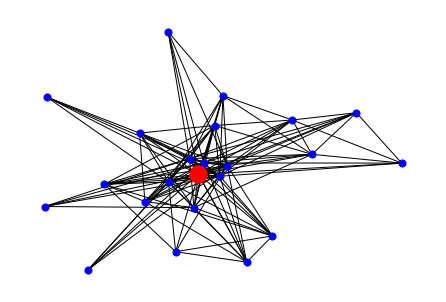

In [77]:
s='Jo'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego,pos,nodelist=[s],node_size=300,node_color='r')
plt.savefig('Jo.png')
plt.show()
nx.write_gml(hub_ego,"egonw_Jo.gml")

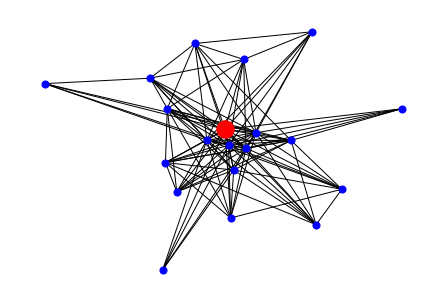

In [78]:
s='Meg'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego,pos,nodelist=[s],node_size=300,node_color='r')
plt.savefig('Meg.png')
plt.show()
nx.write_gml(hub_ego,"egonw_Meg.gml")

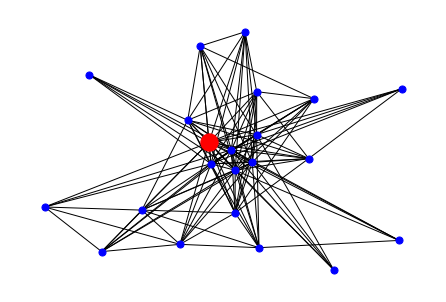

In [79]:
s='Beth'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego,pos,nodelist=[s],node_size=300,node_color='r')
plt.savefig('Beth.png')
plt.show()
nx.write_gml(hub_ego,"egonw_Beth.gml")

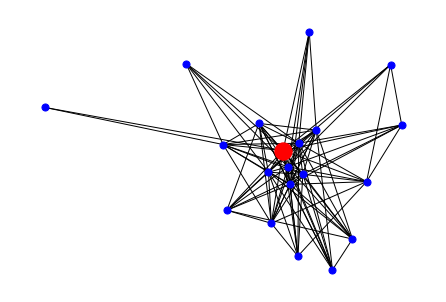

In [80]:
s='Amy'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego,pos,nodelist=[s],node_size=300,node_color='r')
plt.savefig('Amy.png')
plt.show()
nx.write_gml(hub_ego,"egonw_Amy.gml")

# Section 2: Analysis

#### a. Who are the protagonists as per your analysis? If the 4 centralities are not having high correlation, how do you interpret them?

The protagonists as per the analysis are Jo, Meg, Beth, and Amy.

Based on the centrality measures, it appears that Jo is the most central character in the novel, followed by Meg, Amy, and Beth.

Jo's high betweenness centrality suggests that she plays a critical role in connecting other characters in the story. This is fitting, as Jo is often the one who brings her family and friends together, and is the driving force behind many of the novel's important events.

Meg has the highest degree centrality, indicating that she has the most connections to other characters in the story. This makes sense, as Meg is the oldest sister and has a close relationship with all of her siblings.

Amy has the highest eigenvector centrality, suggesting that she is connected to other important characters in the story. This is fitting, as Amy is known for her social status and her connections to wealthy families in the area.

Beth has the lowest centrality measures of the four sisters, indicating that she is less connected to other characters in the story. This is fitting, as Beth is portrayed as the shy and introverted sister who is often isolated from the rest of the family.

Overall, the centrality measures of the Little Women characters suggest that Jo is the most important character in terms of connecting other characters and driving the plot forward, while Meg, Amy, and Beth play important but less central roles in the story.

#### b. What do the clustering coefficients, discovered communities, extracted ego network of protagonists and average shortest path tell you about the dynamics in the story? How is clustering coefficient related to transitivity of nodes?

*Clustering coefficient* - suggests how closely the characters interact with one another. Higher clustering coefficients indicate that characters tend to form groups and interact more closely with each other. In "Little Women," we see that the characters cluster into groups based on family relationships and shared interests, such as the March sisters and their close friends.

*Discovered communities* - highlight the groups of characters that share similar traits or interests. In "Little Women," we see that the characters form communities based on their family ties, class status, and shared experiences. For example, the March sisters form a community of siblings who share a close bond, while their wealthy neighbor, Mr. Laurence, forms a community of older, established adults.

*Extracted ego network of protagonists* - reveals the relationships between the main characters and their immediate connections. In "Little Women," we see that the ego network of each of the March sisters includes family members, close friends, and acquaintances who play important roles in their lives. By analyzing the ego networks, we can see how the characters' relationships change and develop throughout the course of the novel.

*Average shortest path* - measures the average number of steps it takes to go from one node to another in a graph. In "Little Women," it suggests the ease with which characters can communicate and connect with each other. A shorter average shortest path indicates that characters are more closely connected and have fewer barriers to communication

The clustering coefficient is related to transitivity of nodes, as it measures the tendency of nodes to form triangles. In social networks, transitivity refers to the tendency of individuals to form connections with people who are also connected to their friends or acquaintances. In "Little Women," we see examples of transitivity in the form of the March sisters introducing their friends to each other and forming close bonds with one another's acquaintances.

#### c. Compare all the generated graphs (from (f)) to the actual graph. Is there a difference, and if yes, what can it be attributed to? Also, analyze the differences between the 3 generated graph’s attributes.


#### d. Feel free to do any appropriate visualization using Gephi only to substantiate your analysis